# 05: Training the ML algorithm

In [1]:
import SMEFT19
import pandas as pd
import shap

In [2]:
d = SMEFT19.ellipse.load('../data/ellipses/rotBII.yaml')

In [3]:
ML = SMEFT19.ml.train(['../data/samples/randompoints.dat', '../data/samples/samplealbl.dat', '../data/samples/sampleaqbq.dat'],
                 '../data/samples/validationpoints.dat', '../data/MLmodels/xgb_lh.json', d['bf'], headers=0)

[0]	validation_0-rmse:16.98649
[1]	validation_0-rmse:16.14512
[2]	validation_0-rmse:15.34632
[3]	validation_0-rmse:14.58630
[4]	validation_0-rmse:13.86495
[5]	validation_0-rmse:13.18359
[6]	validation_0-rmse:12.53318
[7]	validation_0-rmse:11.91543
[8]	validation_0-rmse:11.33209
[9]	validation_0-rmse:10.77519
[10]	validation_0-rmse:10.24900
[11]	validation_0-rmse:9.74801
[12]	validation_0-rmse:9.27141
[13]	validation_0-rmse:8.82152
[14]	validation_0-rmse:8.39332
[15]	validation_0-rmse:7.98826
[16]	validation_0-rmse:7.60256
[17]	validation_0-rmse:7.23791
[18]	validation_0-rmse:6.89156
[19]	validation_0-rmse:6.56353
[20]	validation_0-rmse:6.25165
[21]	validation_0-rmse:5.95653
[22]	validation_0-rmse:5.67544
[23]	validation_0-rmse:5.40947
[24]	validation_0-rmse:5.15703
[25]	validation_0-rmse:4.91576
[26]	validation_0-rmse:4.68918
[27]	validation_0-rmse:4.47526
[28]	validation_0-rmse:4.27170
[29]	validation_0-rmse:4.07833
[30]	validation_0-rmse:3.89710
[31]	validation_0-rmse:3.72504
[32]	va

## Linear regression

Here we check that the ML approximation correctly reproduces the likelihood of the datapoints

In [4]:
ML = SMEFT19.ml.load_model('../data/MLmodels/xgb_lh.json', '../data/samples/validationpoints.dat', d['bf'])
ML.featurenames = ['C', 'al', 'bl', 'aq', 'bq']

PearsonRResult(statistic=0.9776101389536795, pvalue=0.0)

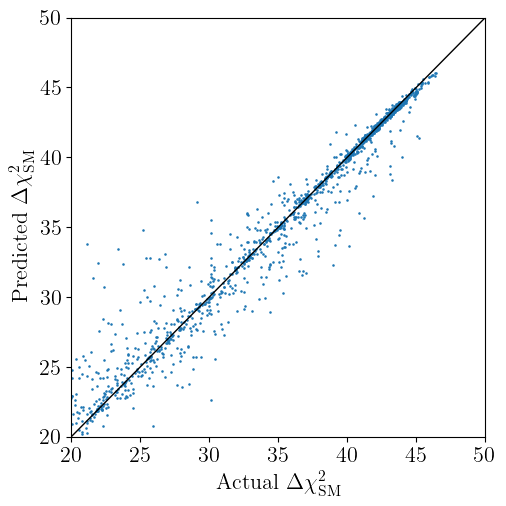

In [5]:
SMEFT19.ml.regr(ML, '../data/samples/validationpoints.dat', '../data/plots/regression_xgb')

## Distribution

Now we generate a small sample of points with a Montecarlo algorithm using the ML-approximation of the likelihood

In [6]:
newpoints = ML.newpoints(500)
df = pd.DataFrame(newpoints, columns=['C', 'al', 'bl', 'aq', 'bq'])
preds = ML.model.predict(df)

In [8]:
import matplotlib.pyplot as plt
from scipy.stats import chi2
import numpy as np

And compare the resulting histogram with the p.d.f of a $\chi^2$ distribution with 5 degrees of freedom

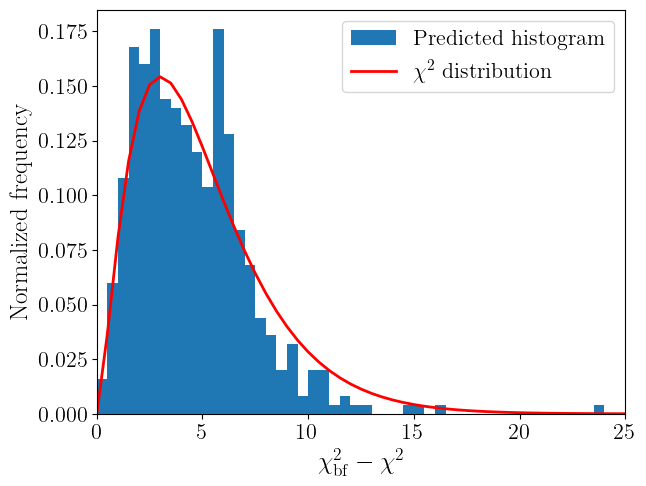

In [9]:
_ = plt.hist(2*max(preds) - 2*preds, bins=50, range=(0,25), density=True, label='Predicted histogram')
plt.plot(np.linspace(0,25,51), chi2(5).pdf(np.linspace(0,25,51)), label=r'$\chi^2$ distribution', lw=2, c='r')
plt.xlim([0,25])
plt.xlabel(r'$\chi^2_\mathrm{bf} - \chi^2$', fontsize=18)
plt.ylabel('Normalized frequency', fontsize=18)
plt.legend(fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout(pad=0.5)
plt.savefig('../data/plots/hist_xgb.pdf')
plt.savefig('../data/plots/hist_xgb.pgf')

## SHAP

In [10]:
newpoints += ML.newpoints(500)

In [11]:
ML = SMEFT19.ml.load_model('../data/MLmodels/xgb_lh.json', '../data/samples/validationpoints.dat', d['bf'])
ML.featurenames = ['C', 'al', 'bl', 'aq', 'bq']

In [12]:
dfnewpoints = pd.DataFrame(newpoints, columns=['C', 'al', 'bl', 'aq', 'bq'])
dfnewpoints['logL'] = ML.model.predict(dfnewpoints)
dfnewpoints.to_csv('../data/samples/mlpoints.dat', sep='\t', index=False)

In [13]:
explainer = shap.TreeExplainer(ML.model)
print(f'Base value: {float(explainer.expected_value)}')
bfs = pd.DataFrame(data=d['bf'].reshape(1, 5), columns = ['$C$', '$\\alpha^\\ell$',
                                              '$\\beta^\\ell$', '$\\alpha^q$',
                                              '$\\beta^q$'] )
print(f'SHAP values: {explainer.shap_values(bfs)}')
total = float(explainer.expected_value)+np.sum(explainer.shap_values(bfs))
print(f'Total prediction: {total}')

Base value: 0.5
SHAP values: [[0.8984124 1.0841255 0.1545804 1.0430342 0.5202897]]
Total prediction: 21.911547422409058


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

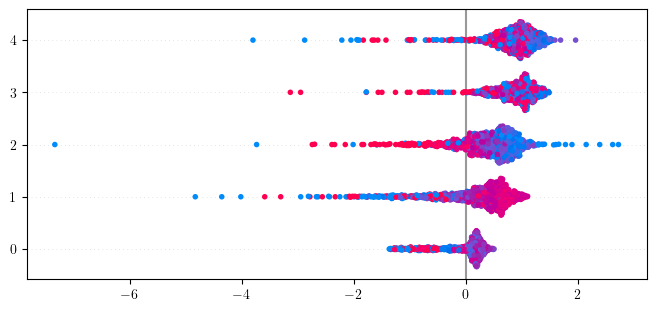

In [14]:
SMEFT19.ml.SHAP_summary('../data/MLmodels/xgb_lh.json', '../data/samples/mlpoints.dat', '../data/plots/SHAP_summary', 0)

In [15]:
import matplotlib.pyplot as plt
import numpy as np

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


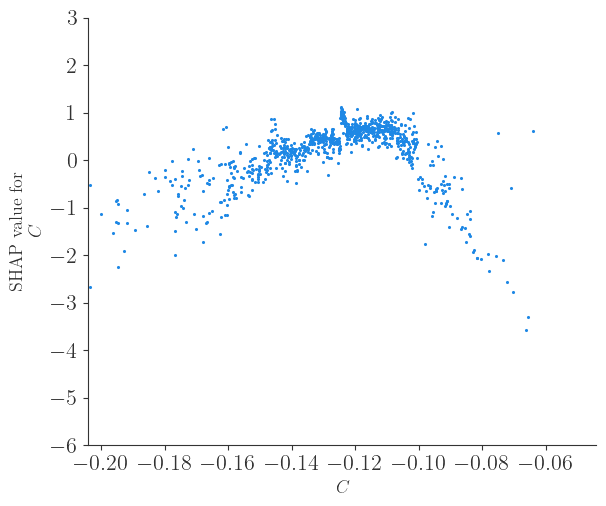

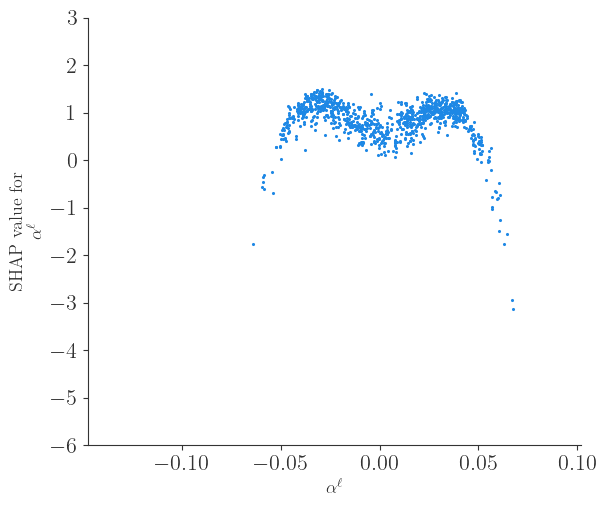

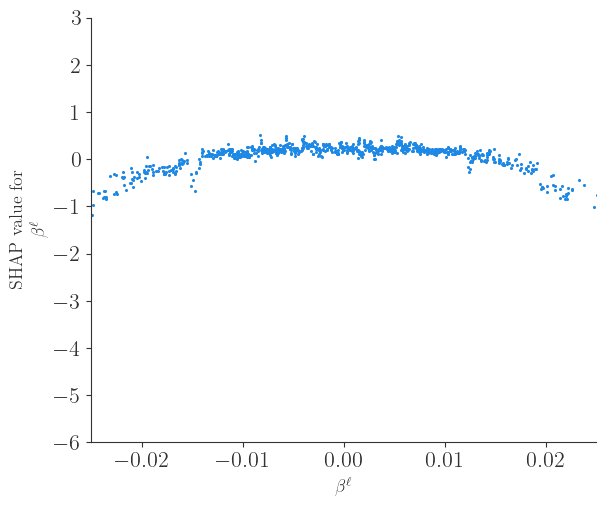

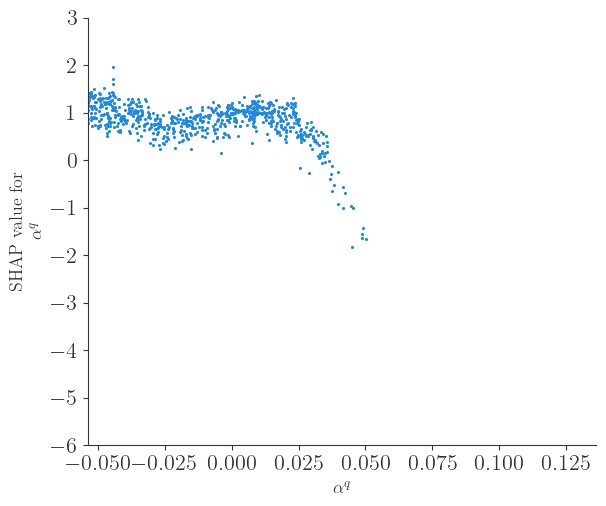

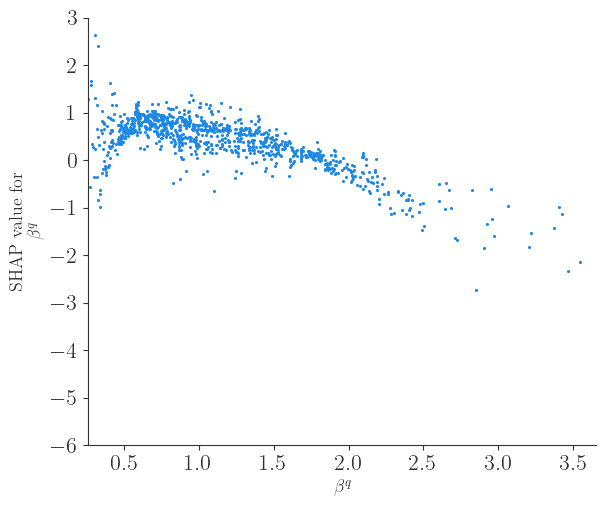

In [27]:
names = ['C', 'al', 'bl', 'aq', 'bq']
bf = d["bf"]
ranges = [[-0.08, 0.08], [-0.18, 0.07], [-0.025, 0.025], [-0.07, 0.12], [-0.6,2.8]]
for i in range(5):
    SMEFT19.ml.SHAP_param('../data/MLmodels/xgb_lh.json', '../data/samples/mlpoints.dat', i, 0)
    ax = plt.gca()
    plt.xlim([bf[i]+ranges[i][0], bf[i]+ranges[i][1]])
    #ax.set_xticks(np.linspace(ranges[i][0], ranges[i][1], 5))
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.tight_layout(pad=0.5)
    plt.savefig(f'../data/plots/SHAP_{names[i]}.pdf')